# Import Modules and Libraries

In [116]:
# import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from numpy import median
from scipy import stats
from scipy.stats import randint
import mlxtend

# prep
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.preprocessing import binarize, LabelEncoder, MinMaxScaler

# Validation libraries
from sklearn import metrics
from sklearn.metrics import accuracy_score, mean_squared_error, precision_recall_curve, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')


#Stacking
from mlxtend.classifier import StackingClassifier

# models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

# Datasets of Mental Health illness 2014

In [117]:
url = "https://raw.githubusercontent.com/ZulaikhaDollah/Mental-Illness/master/Mental-Illness-2014.csv"
mental_df = pd.read_csv(url, error_bad_lines=False)

In [118]:
mental_df.head(5)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [119]:
mental_df.shape
mental_df.describe()
mental_df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
Timestamp                    1259 non-null object
Age                          1259 non-null int64
Gender                       1259 non-null object
Country                      1259 non-null object
state                        744 non-null object
self_employed                1241 non-null object
family_history               1259 non-null object
treatment                    1259 non-null object
work_interfere               995 non-null object
no_employees                 1259 non-null object
remote_work                  1259 non-null object
tech_company                 1259 non-null object
benefits                     1259 non-null object
care_options                 1259 non-null object
wellness_program             1259 non-null object
seek_help                    1259 non-null object
anonymity                    1259 non-null object
leave                        1259 non-null obj

# Remove duplicates variables

In [120]:
mental_df.drop_duplicates()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
5,2014-08-27 11:31:22,33,Male,United States,TN,NaN,Yes,No,Sometimes,6-25,...,Don't know,No,No,Yes,Yes,No,Maybe,Don't know,No,NaN
6,2014-08-27 11:31:50,35,Female,United States,MI,NaN,Yes,Yes,Sometimes,1-5,...,Somewhat difficult,Maybe,Maybe,Some of them,No,No,No,Don't know,No,NaN
7,2014-08-27 11:32:05,39,M,Canada,NaN,NaN,No,No,Never,1-5,...,Don't know,No,No,No,No,No,No,No,No,NaN
8,2014-08-27 11:32:39,42,Female,United States,IL,NaN,Yes,Yes,Sometimes,100-500,...,Very difficult,Maybe,No,Yes,Yes,No,Maybe,No,No,NaN
9,2014-08-27 11:32:43,23,Male,Canada,NaN,NaN,No,No,Never,26-100,...,Don't know,No,No,Yes,Yes,Maybe,Maybe,Yes,No,NaN


# Data Cleaning 

Remove/drop the columns

In [121]:
mental_df = mental_df.drop(['Timestamp','comments','state'], axis= 1)
mental_df.isnull().sum().max()
mental_df.head(2)

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,NaN,No,Yes,Often,6-25,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,NaN,No,No,Rarely,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No


Identify the missing values

In [122]:
mental_df.columns[mental_df.isnull().any()]

Index(['self_employed', 'work_interfere'], dtype='object')

In [123]:
check_1 = pd.isnull(mental_df["self_employed"])
mental_df[check_1]

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,NaN,No,Yes,Often,6-25,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,NaN,No,No,Rarely,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,NaN,No,No,Rarely,6-25,No,Yes,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,NaN,Yes,Yes,Often,26-100,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,NaN,No,No,Never,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No
5,33,Male,United States,NaN,Yes,No,Sometimes,6-25,No,Yes,...,Don't know,Don't know,No,No,Yes,Yes,No,Maybe,Don't know,No
6,35,Female,United States,NaN,Yes,Yes,Sometimes,1-5,Yes,Yes,...,No,Somewhat difficult,Maybe,Maybe,Some of them,No,No,No,Don't know,No
7,39,M,Canada,NaN,No,No,Never,1-5,Yes,Yes,...,Yes,Don't know,No,No,No,No,No,No,No,No
8,42,Female,United States,NaN,Yes,Yes,Sometimes,100-500,No,Yes,...,No,Very difficult,Maybe,No,Yes,Yes,No,Maybe,No,No
9,23,Male,Canada,NaN,No,No,Never,26-100,No,Yes,...,Don't know,Don't know,No,No,Yes,Yes,Maybe,Maybe,Yes,No


In [124]:
mental_df["self_employed"].fillna("No", inplace = True)
mental_df.head(2)

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,No,No,Yes,Often,6-25,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,No,No,No,Rarely,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No


In [125]:
check_2 = pd.isnull(mental_df["work_interfere"])
mental_df[check_2]

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
19,36,Male,France,Yes,Yes,No,NaN,6-25,Yes,Yes,...,Yes,Somewhat easy,No,No,Some of them,Some of them,Maybe,Maybe,Don't know,No
26,33,male,United States,No,No,No,NaN,1-5,No,Yes,...,Don't know,Don't know,Maybe,Maybe,Some of them,No,No,No,Don't know,No
37,38,Male,Portugal,No,No,No,NaN,100-500,No,Yes,...,Don't know,Somewhat easy,Maybe,No,Some of them,Some of them,No,Maybe,No,No
38,50,M,United States,No,No,No,NaN,100-500,No,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,No,Maybe,Don't know,No
41,35,Male,United States,No,No,No,NaN,More than 1000,Yes,Yes,...,Don't know,Somewhat difficult,Yes,Yes,Some of them,No,No,Maybe,Don't know,No
46,28,Male,United Kingdom,No,No,No,NaN,26-100,No,Yes,...,Don't know,Don't know,No,Maybe,Some of them,Yes,Maybe,Yes,Don't know,No
47,34,Male,United States,No,No,No,NaN,6-25,No,Yes,...,Don't know,Don't know,No,No,Yes,Yes,Maybe,Yes,Don't know,No
51,33,Male,United States,No,No,No,NaN,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Maybe,Maybe,Don't know,No
52,31,M,United States,No,No,No,NaN,100-500,Yes,Yes,...,Don't know,Don't know,Maybe,Maybe,Some of them,Some of them,Maybe,Maybe,Don't know,No
54,28,M,Switzerland,No,No,No,NaN,100-500,No,Yes,...,Don't know,Don't know,No,No,No,No,No,Maybe,Don't know,No


In [126]:
mental_df["work_interfere"].fillna("No", inplace = True)
mental_df.head(2)

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,No,No,Yes,Often,6-25,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,No,No,No,Rarely,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No


In [127]:
mental_df.columns[mental_df.isnull().any()]
mental_df

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,No,No,Yes,Often,6-25,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,No,No,No,Rarely,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,No,No,No,Rarely,6-25,No,Yes,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,No,Yes,Yes,Often,26-100,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,No,No,No,Never,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No
5,33,Male,United States,No,Yes,No,Sometimes,6-25,No,Yes,...,Don't know,Don't know,No,No,Yes,Yes,No,Maybe,Don't know,No
6,35,Female,United States,No,Yes,Yes,Sometimes,1-5,Yes,Yes,...,No,Somewhat difficult,Maybe,Maybe,Some of them,No,No,No,Don't know,No
7,39,M,Canada,No,No,No,Never,1-5,Yes,Yes,...,Yes,Don't know,No,No,No,No,No,No,No,No
8,42,Female,United States,No,Yes,Yes,Sometimes,100-500,No,Yes,...,No,Very difficult,Maybe,No,Yes,Yes,No,Maybe,No,No
9,23,Male,Canada,No,No,No,Never,26-100,No,Yes,...,Don't know,Don't know,No,No,Yes,Yes,Maybe,Maybe,Yes,No


Sort "Gender" into 3 categories (male, female and others)

In [128]:
mental_df["Gender"]= mental_df["Gender"].str.lower() 
mental_df["Gender"].unique()

array(['female', 'm', 'male', 'male-ish', 'maile', 'trans-female',
       'cis female', 'f', 'something kinda male?', 'cis male', 'woman',
       'mal', 'male (cis)', 'queer/she/they', 'non-binary', 'femake',
       'make', 'nah', 'all', 'enby', 'fluid', 'genderqueer', 'female ',
       'androgyne', 'agender', 'cis-female/femme', 'guy (-ish) ^_^',
       'male leaning androgynous', 'male ', 'man', 'trans woman', 'msle',
       'neuter', 'female (trans)', 'queer', 'female (cis)', 'mail',
       'a little about you', 'malr', 'p', 'femail', 'cis man',
       'ostensibly male, unsure what that really means'], dtype=object)

In [129]:
male_gender =["male", "m", "male-ish", "maile", "mal", "male (cis)", "make", "male ", "man","msle", "mail", "malr","cis man", "Cis Male", "cis male", "ostensibly male, unsure what that really means", "guy (-ish) ^_^", "male leaning androgynous"]
female_gender = ["cis female", "f", "female", "woman",  "femake", "female ","cis-female/femme", "female (cis)", "femail"]
others_gender = ["trans-female", "something kinda male?", "queer/she/they", "non-binary", "nah", "all", "enby", "fluid", "genderqueer", "androgyne", "agender", "trans woman", "neuter", "female (trans)", "queer", "p", "a little about you", "unsure what that really means"]

In [130]:
mental_df["Gender"].replace(to_replace = male_gender , value = "male", inplace = True)
mental_df["Gender"].replace(to_replace = female_gender, value = "female", inplace = True)
mental_df["Gender"].replace(to_replace = others_gender, value = "others", inplace = True)
mental_df

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,female,United States,No,No,Yes,Often,6-25,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,male,United States,No,No,No,Rarely,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,male,Canada,No,No,No,Rarely,6-25,No,Yes,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,male,United Kingdom,No,Yes,Yes,Often,26-100,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,male,United States,No,No,No,Never,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No
5,33,male,United States,No,Yes,No,Sometimes,6-25,No,Yes,...,Don't know,Don't know,No,No,Yes,Yes,No,Maybe,Don't know,No
6,35,female,United States,No,Yes,Yes,Sometimes,1-5,Yes,Yes,...,No,Somewhat difficult,Maybe,Maybe,Some of them,No,No,No,Don't know,No
7,39,male,Canada,No,No,No,Never,1-5,Yes,Yes,...,Yes,Don't know,No,No,No,No,No,No,No,No
8,42,female,United States,No,Yes,Yes,Sometimes,100-500,No,Yes,...,No,Very difficult,Maybe,No,Yes,Yes,No,Maybe,No,No
9,23,male,Canada,No,No,No,Never,26-100,No,Yes,...,Don't know,Don't know,No,No,Yes,Yes,Maybe,Maybe,Yes,No


In [131]:
mental_df["Gender"].unique()

array(['female', 'male', 'others'], dtype=object)

Identify missing value in "Age" column

In [132]:
check_3 = pd.isnull(mental_df["Age"]) 
mental_df[check_3]

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence


In [133]:
new_age = pd.Series(mental_df['Age'])
new_age

0       37
1       44
2       32
3       31
4       31
5       33
6       35
7       39
8       42
9       23
10      31
11      29
12      42
13      36
14      27
15      29
16      23
17      32
18      46
19      36
20      29
21      31
22      46
23      41
24      33
25      35
26      33
27      35
28      34
29      37
        ..
1229    39
1230    23
1231    24
1232    25
1233    23
1234    24
1235    23
1236    60
1237    28
1238    28
1239    30
1240    31
1241    31
1242    28
1243    43
1244    32
1245    22
1246    32
1247    36
1248    41
1249    30
1250    30
1251    36
1252    29
1253    36
1254    26
1255    32
1256    34
1257    46
1258    25
Name: Age, Length: 1259, dtype: int64

Sort "Age" into several range of age

In [134]:
mental_df['Age'].fillna(mental_df['Age'].median(), inplace = True)


new_age = pd.Series(mental_df['Age'])
new_age[new_age<18] = mental_df['Age'].median()
mental_df['Age'] = new_age
new_age = pd.Series(mental_df['Age'])
new_age[new_age>120] = mental_df['Age'].median()
mental_df['Age'] = new_age


mental_df['age_range'] = pd.cut(mental_df['Age'], [0,20,30,65,100], labels=["0-20", "21-30", "31-65", "66-100"], include_lowest=True)
mental_df

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,age_range
0,37,female,United States,No,No,Yes,Often,6-25,No,Yes,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,31-65
1,44,male,United States,No,No,No,Rarely,More than 1000,No,No,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,31-65
2,32,male,Canada,No,No,No,Rarely,6-25,No,Yes,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,31-65
3,31,male,United Kingdom,No,Yes,Yes,Often,26-100,No,Yes,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,31-65
4,31,male,United States,No,No,No,Never,100-500,Yes,Yes,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,31-65
5,33,male,United States,No,Yes,No,Sometimes,6-25,No,Yes,...,Don't know,No,No,Yes,Yes,No,Maybe,Don't know,No,31-65
6,35,female,United States,No,Yes,Yes,Sometimes,1-5,Yes,Yes,...,Somewhat difficult,Maybe,Maybe,Some of them,No,No,No,Don't know,No,31-65
7,39,male,Canada,No,No,No,Never,1-5,Yes,Yes,...,Don't know,No,No,No,No,No,No,No,No,31-65
8,42,female,United States,No,Yes,Yes,Sometimes,100-500,No,Yes,...,Very difficult,Maybe,No,Yes,Yes,No,Maybe,No,No,31-65
9,23,male,Canada,No,No,No,Never,26-100,No,Yes,...,Don't know,No,No,Yes,Yes,Maybe,Maybe,Yes,No,21-30


Check the unique value of the columns

In [135]:
mental_df["self_employed"].unique()

array(['No', 'Yes'], dtype=object)

In [136]:
mental_df["work_interfere"].unique()

array(['Often', 'Rarely', 'Never', 'Sometimes', 'No'], dtype=object)

In [137]:
mental_df["work_interfere"].replace(to_replace = "No", value = "Don't Know", inplace = True)
mental_df["work_interfere"].unique()

array(['Often', 'Rarely', 'Never', 'Sometimes', "Don't Know"],
      dtype=object)

In [138]:
mental_df["leave"].unique()

array(['Somewhat easy', "Don't know", 'Somewhat difficult',
       'Very difficult', 'Very easy'], dtype=object)

In [139]:
mental_df.columns

Index(['Age', 'Gender', 'Country', 'self_employed', 'family_history',
       'treatment', 'work_interfere', 'no_employees', 'remote_work',
       'tech_company', 'benefits', 'care_options', 'wellness_program',
       'seek_help', 'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'age_range'],
      dtype='object')

In [140]:
mental_df.dtypes

Age                             int64
Gender                         object
Country                        object
self_employed                  object
family_history                 object
treatment                      object
work_interfere                 object
no_employees                   object
remote_work                    object
tech_company                   object
benefits                       object
care_options                   object
wellness_program               object
seek_help                      object
anonymity                      object
leave                          object
mental_health_consequence      object
phys_health_consequence        object
coworkers                      object
supervisor                     object
mental_health_interview        object
phys_health_interview          object
mental_vs_physical             object
obs_consequence                object
age_range                    category
dtype: object

# Data Encoding

In [141]:
lb_make = preprocessing.LabelEncoder()

In [142]:
labelDict = {}
for feature in mental_df.select_dtypes(include=['object'
                                                , 'category']):
    le = preprocessing.LabelEncoder()
    le.fit(mental_df[feature])
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    mental_df[feature] = le.transform(mental_df[feature])

 # Get labels
    labelKey = 'label_' + feature
    labelValue = [*le_name_mapping]
    labelDict[labelKey] =labelValue
    
for key, value in labelDict.items():     
    print(key, value)


label_Gender ['female', 'male', 'others']
label_Country ['Australia', 'Austria', 'Bahamas, The', 'Belgium', 'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Canada', 'China', 'Colombia', 'Costa Rica', 'Croatia', 'Czech Republic', 'Denmark', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Hungary', 'India', 'Ireland', 'Israel', 'Italy', 'Japan', 'Latvia', 'Mexico', 'Moldova', 'Netherlands', 'New Zealand', 'Nigeria', 'Norway', 'Philippines', 'Poland', 'Portugal', 'Romania', 'Russia', 'Singapore', 'Slovenia', 'South Africa', 'Spain', 'Sweden', 'Switzerland', 'Thailand', 'United Kingdom', 'United States', 'Uruguay', 'Zimbabwe']
label_self_employed ['No', 'Yes']
label_family_history ['No', 'Yes']
label_treatment ['No', 'Yes']
label_work_interfere ["Don't Know", 'Never', 'Often', 'Rarely', 'Sometimes']
label_no_employees ['1-5', '100-500', '26-100', '500-1000', '6-25', 'More than 1000']
label_remote_work ['No', 'Yes']
label_tech_company ['No', 'Yes']
label_benefits ["Don't know", 'No',

In [143]:
mental_df["make_country"] = le.fit_transform(mental_df["Country"])
mental_df[["make_country", "Country"]]

,make_country,Country
0,45,45
1,45,45
2,7,7
3,44,44
4,45,45
5,45,45
6,45,45
7,7,7
8,45,45
9,7,7


In [144]:
mental_df.head(5)

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,age_range,make_country
0,37,0,45,0,0,1,2,4,0,1,...,1,1,1,2,1,0,2,0,2,45
1,44,1,45,0,0,0,3,5,0,0,...,0,1,0,0,1,1,0,0,2,45
2,32,1,7,0,0,0,3,4,0,1,...,1,1,2,2,2,2,1,0,2,7
3,31,1,44,0,1,1,2,2,0,1,...,2,2,1,0,0,0,1,1,2,44
4,31,1,45,0,0,0,1,1,1,1,...,1,1,1,2,2,2,0,0,2,45


In [145]:
mental_df.dtypes

Age                          int64
Gender                       int64
Country                      int64
self_employed                int64
family_history               int64
treatment                    int64
work_interfere               int64
no_employees                 int64
remote_work                  int64
tech_company                 int64
benefits                     int64
care_options                 int64
wellness_program             int64
seek_help                    int64
anonymity                    int64
leave                        int64
mental_health_consequence    int64
phys_health_consequence      int64
coworkers                    int64
supervisor                   int64
mental_health_interview      int64
phys_health_interview        int64
mental_vs_physical           int64
obs_consequence              int64
age_range                    int64
make_country                 int64
dtype: object

# Convariance Matrix

Summary of the relationship between variables

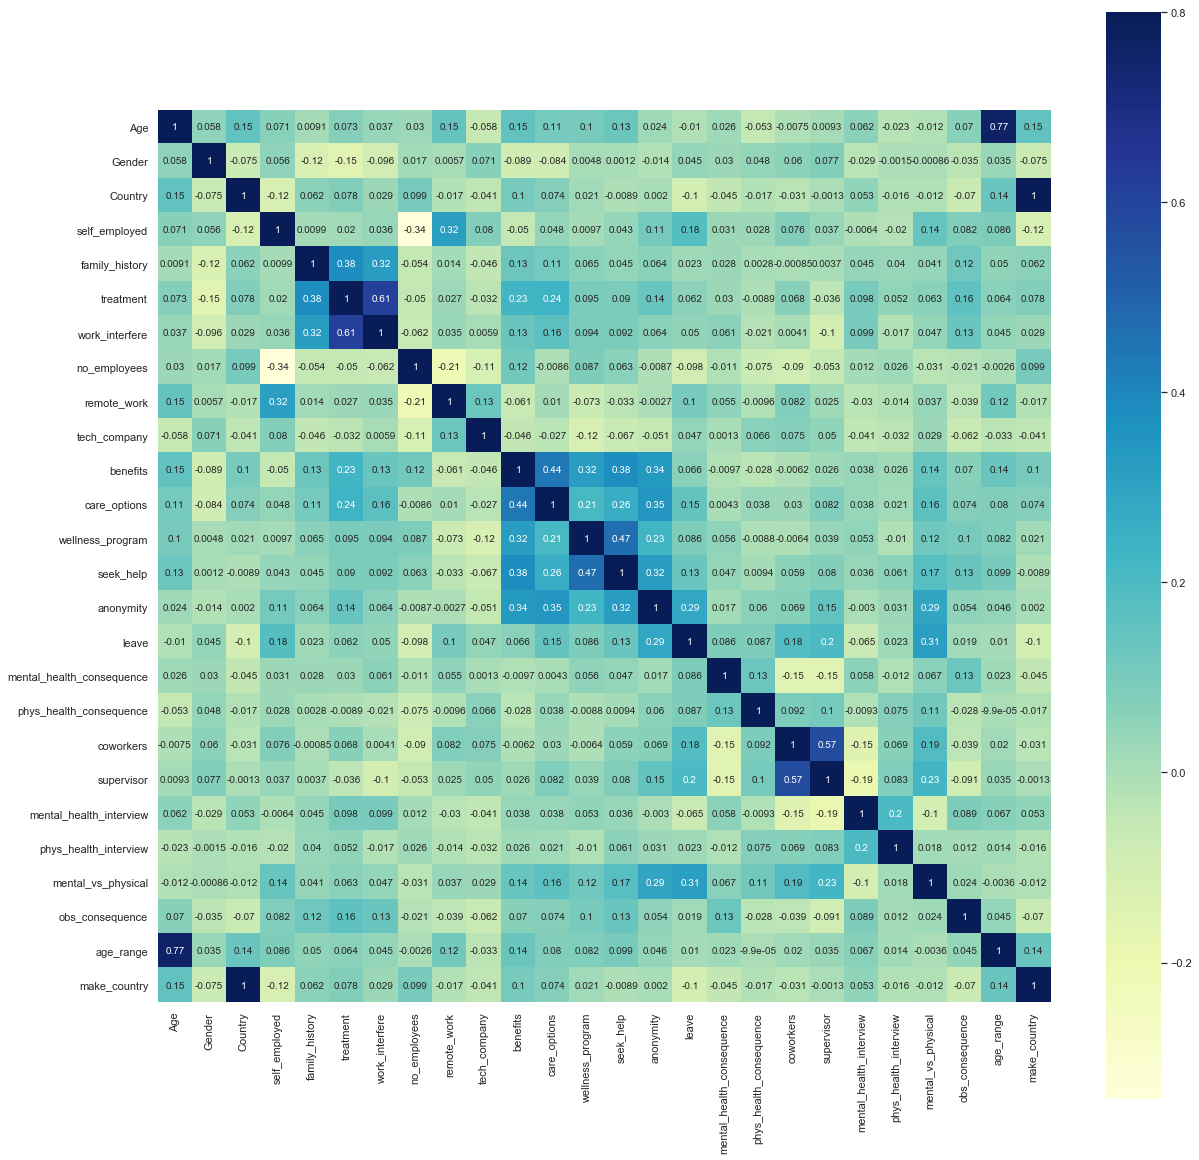

In [146]:
corrmat = mental_df.corr()
fig, axe = plt.subplots(figsize=(20, 20))
sns.heatmap(corrmat, vmax=.8, square=True, cmap="YlGnBu", annot = True);
plt.show()

# Data Visualisation

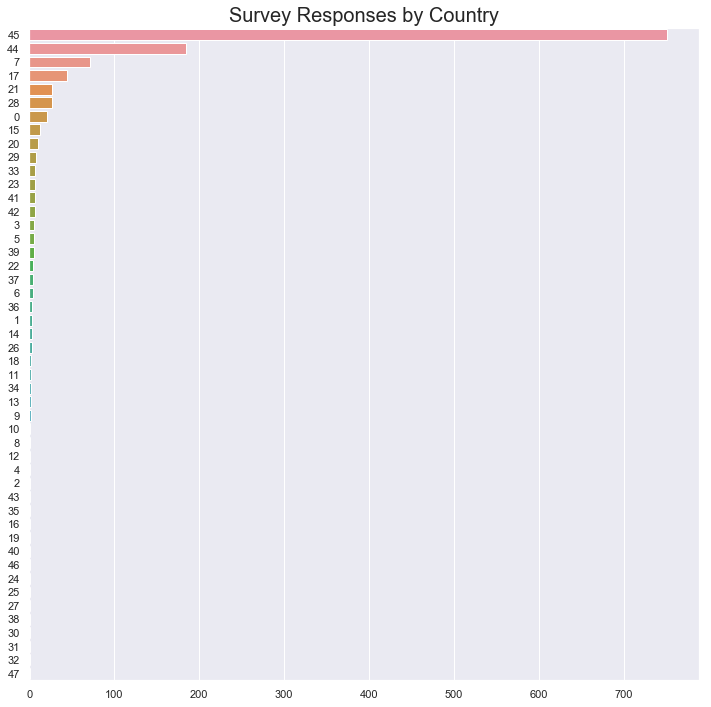

In [147]:
plt.figure(figsize=(12, 12))
sns.countplot(y='Country', order = mental_df['Country'].value_counts().index, data=mental_df)
plt.title('Survey Responses by Country', fontsize=20)
plt.xlabel('')
plt.ylabel('')
plt.show()

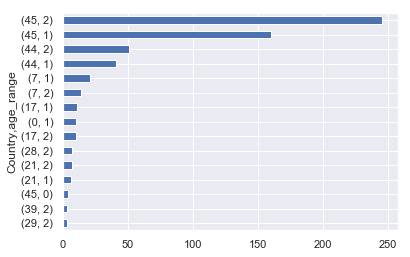

In [148]:
x = mental_df.groupby(["Country", "age_range"]).treatment.sum().sort_values().tail(15)
x.plot(kind="barh")

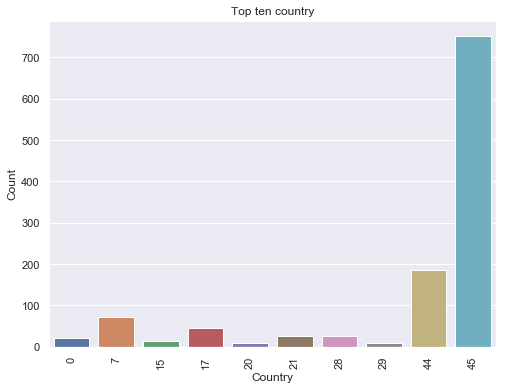

In [149]:
from collections import Counter

country_count = Counter(mental_df['Country'].dropna().tolist()).most_common(10)
country_idx = [country[0] for country in country_count]
country_val = [country[1] for country in country_count]
fig,ax = plt.subplots(figsize=(8,6))
sns.barplot(x = country_idx,y=country_val ,ax =ax)
plt.title('Top ten country')
plt.xlabel('Country')
plt.ylabel('Count')
ticks = plt.setp(ax.get_xticklabels(),rotation=90)

Text(0.5, 0, 'Age')

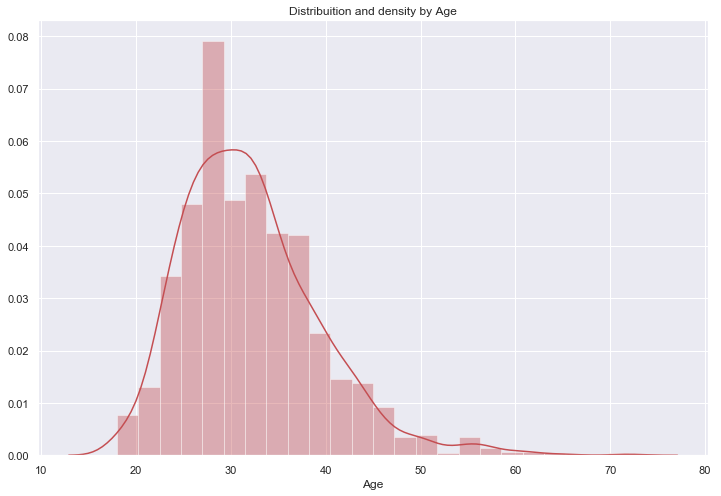

In [150]:
plt.figure(figsize=(12,8))
sns.distplot(mental_df["Age"], bins=24, color='r')
plt.title("Distribuition and density by Age")
plt.xlabel("Age")

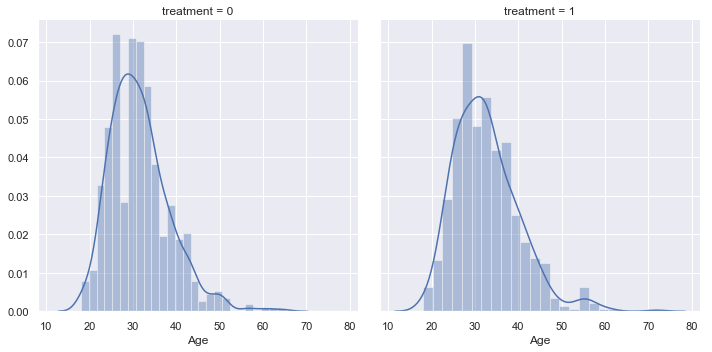

In [151]:
g = sns.FacetGrid(mental_df, col='treatment', size=5)
g = g.map(sns.distplot, "Age")

Text(0.5, 1.0, 'Total Distribuition by treated')

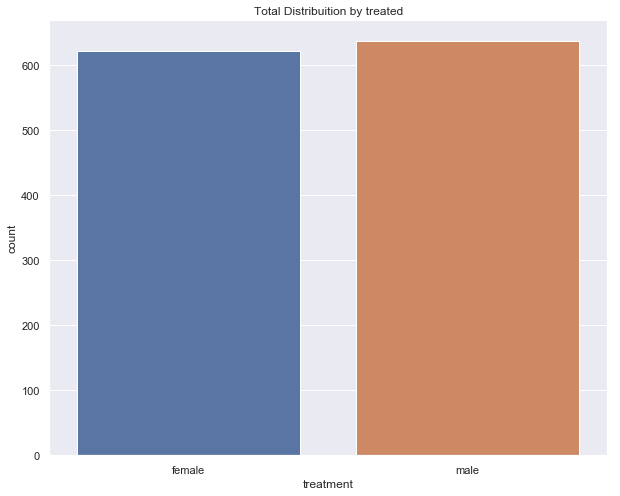

In [152]:
plt.figure(figsize=(10,8))
labels = labelDict['label_Gender']
g = sns.countplot(x="treatment", data=mental_df)
g.set_xticklabels(labels)

plt.title('Total Distribuition by treated')

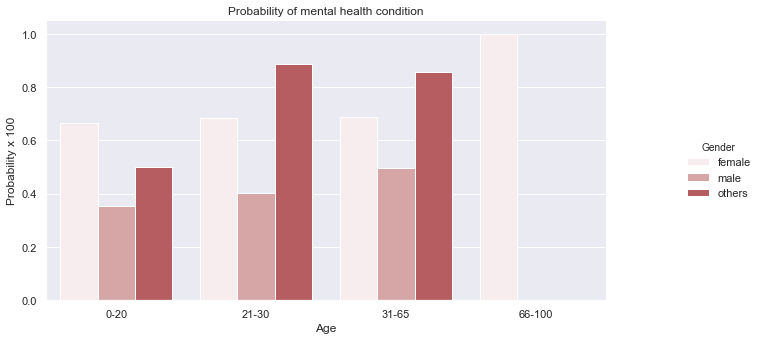

In [153]:
o = labelDict['label_age_range']

g = sns.factorplot(x="age_range", y="treatment", hue="Gender", data=mental_df, kind="bar",  ci=None, size=5, aspect=2, legend_out = True, color='r')
g.set_xticklabels(o)

plt.title('Probability of mental health condition')
plt.ylabel('Probability x 100')
plt.xlabel('Age')
# replace legend labels

new_labels = labelDict['label_Gender']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

# Positioning the legend
g.fig.subplots_adjust(top=0.9,right=0.8)

plt.show()

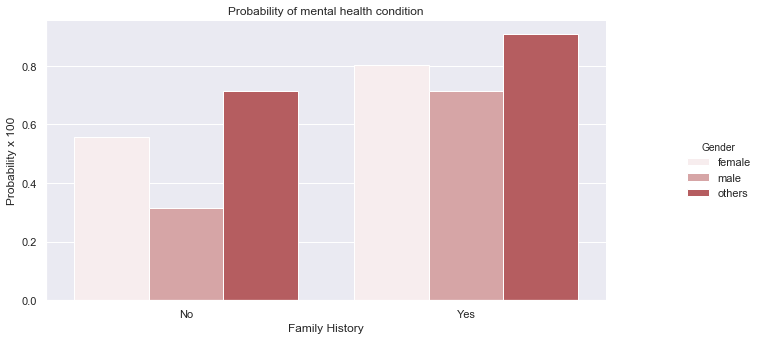

In [154]:
o = labelDict['label_family_history']
g = sns.factorplot(x="family_history", y="treatment", hue="Gender", data=mental_df, kind="bar", ci=None, size=5, aspect=2, legend_out = True, color='r')
g.set_xticklabels(o)
plt.title('Probability of mental health condition')
plt.ylabel('Probability x 100')
plt.xlabel('Family History')

# replace legend labels
new_labels = labelDict['label_Gender']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

# Positioning the legend
g.fig.subplots_adjust(top=0.9,right=0.8)

plt.show()

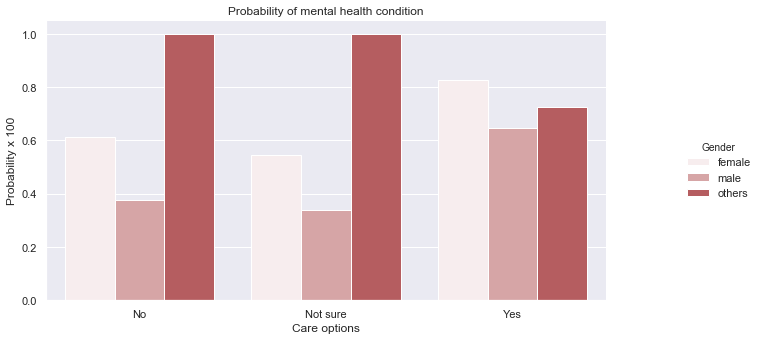

In [155]:
o = labelDict['label_care_options']
g = sns.factorplot(x="care_options", y="treatment", hue="Gender", data=mental_df, kind="bar", ci=None, size=5, aspect=2, legend_out = True, color='r')
g.set_xticklabels(o)
plt.title('Probability of mental health condition')
plt.ylabel('Probability x 100')
plt.xlabel('Care options')

# replace legend labels
new_labels = labelDict['label_Gender']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

# Positioning the legend
g.fig.subplots_adjust(top=0.9,right=0.8)
plt.show()

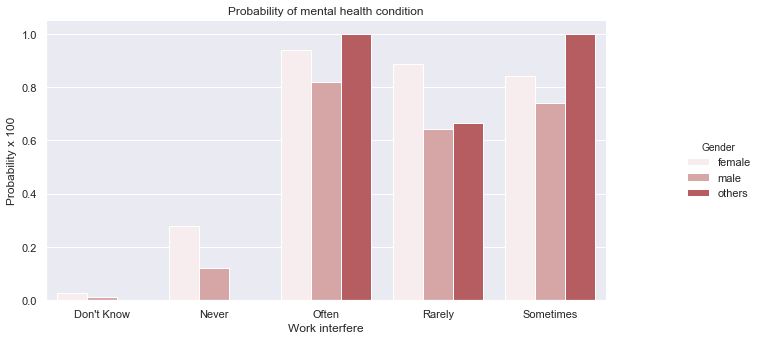

In [156]:
o = labelDict['label_work_interfere']
g = sns.factorplot(x="work_interfere", y="treatment", hue="Gender", data=mental_df, kind="bar", ci=None, size=5, aspect=2, legend_out = True, color='r')
g.set_xticklabels(o)
plt.title('Probability of mental health condition')
plt.ylabel('Probability x 100')
plt.xlabel('Work interfere')

# replace legend labels
new_labels = labelDict['label_Gender']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

# Positioning the legend
g.fig.subplots_adjust(top=0.9,right=0.8)
plt.show()

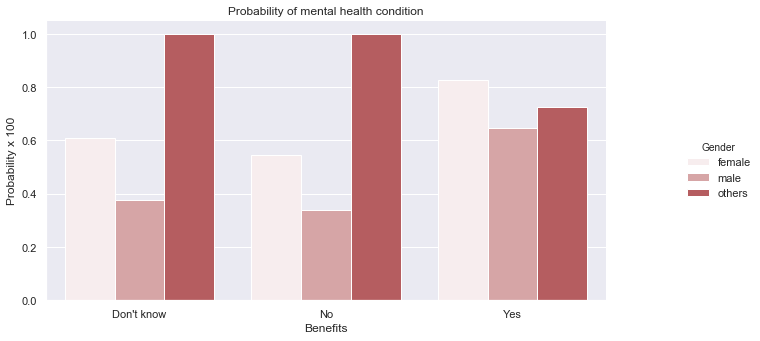

In [157]:
o = labelDict['label_benefits']
g = sns.factorplot(x="care_options", y="treatment", hue="Gender", data=mental_df, kind="bar", ci=None, size=5, aspect=2, legend_out = True, color='r')
g.set_xticklabels(o)
plt.title('Probability of mental health condition')
plt.ylabel('Probability x 100')
plt.xlabel('Benefits')

# replace legend labels
new_labels = labelDict['label_Gender']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

# Positioning the legend
g.fig.subplots_adjust(top=0.9,right=0.8)
plt.show()

# Data Scaling and Fitting

In [158]:
# Scaling Age as it different from other
scaler = MinMaxScaler()
mental_df['Age'] = scaler.fit_transform(mental_df[['Age']])
mental_df.head()

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,age_range,make_country
0,0.351852,0,45,0,0,1,2,4,0,1,...,1,1,1,2,1,0,2,0,2,45
1,0.481481,1,45,0,0,0,3,5,0,0,...,0,1,0,0,1,1,0,0,2,45
2,0.259259,1,7,0,0,0,3,4,0,1,...,1,1,2,2,2,2,1,0,2,7
3,0.240741,1,44,0,1,1,2,2,0,1,...,2,2,1,0,0,0,1,1,2,44
4,0.240741,1,45,0,0,0,1,1,1,1,...,1,1,1,2,2,2,0,0,2,45


# Split Training and Testing

In [159]:
# define X and y
selected_cols = ['Age', 'Gender', 'family_history', 'benefits', 'care_options', 'anonymity', 'leave', 'work_interfere',
                 'seek_help', 'self_employed', 'remote_work', 'coworkers', 'supervisor']
X = mental_df[selected_cols]
Y = mental_df.treatment

# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3, random_state=1) 

# Features Importance

1. feature 7 (0.354499)
2. feature 0 (0.124782)
3. feature 2 (0.094405)
4. feature 6 (0.069525)
5. feature 4 (0.056577)
6. feature 3 (0.047950)
7. feature 12 (0.047421)
8. feature 11 (0.046461)
9. feature 8 (0.042675)
10. feature 1 (0.035130)
11. feature 10 (0.030414)
12. feature 5 (0.029991)
13. feature 9 (0.020170)


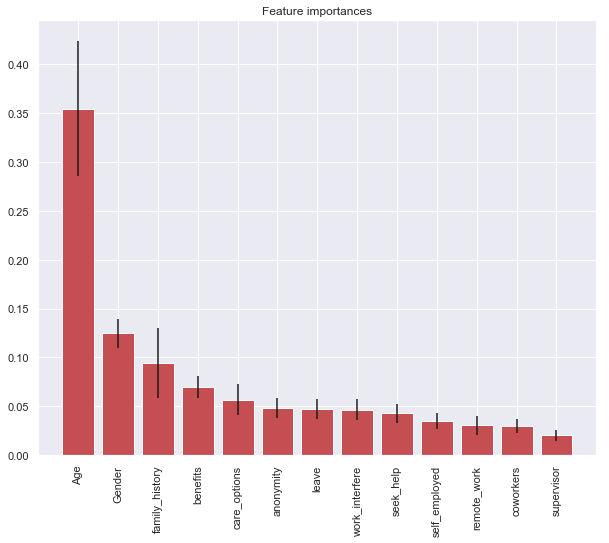

In [160]:
# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, Y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

labels = []
for f in range(X.shape[1]):
    labels.append(selected_cols[f])
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
    
# Plot the feature importances of the forest
plt.figure(figsize=(10,8))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), labels, rotation='vertical')
plt.xlim([-1, X.shape[1]])
plt.show()

# Decision Tree

In [161]:
# Calculating the best parameters
tree = DecisionTreeClassifier()

In [162]:
# train a decision tree model on the training set
tree = DecisionTreeClassifier(max_depth=4, min_samples_split=8, max_features=6, criterion='entropy', min_samples_leaf=7)
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=6, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=7,
            min_samples_split=8, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [163]:
y_pred = tree.predict(X_test) 
print("Predicted values:") 
print(y_pred) 

Predicted values:
[1 0 1 0 0 0 1 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0 0 1 1 1 0 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1 1 0 0 1 1 0 0 0 1 1
 1 0 1 1 1 1 0 1 0 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 0 0 1 1 1 0 1 0
 0 1 0 0 1 1 1 1 0 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 0 1 1 0
 1 0 1 1 0 1 0 0 1 0 0 1 0 1 1 1 1 0 1 1 0 0 0 1 0 1 0 1 1 1 0 0 1 0 1 1 0
 1 0 1 0 0 0 1 1 0 1 1 1 0 1 1 0 1 1 1 0 1 1 0 1 0 0 1 0 0 0 0 1 0 0 0 1 1
 1 1 1 1 1 1 0 0 1 1 0 1 1 1 0 1 1 1 0 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 1 1 1
 0 0 1 1 1 0 0 1 1 1 1 1 0 1 1 0 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 0 0 0 1 1 1
 1 1 1 1 1 1 0 1 0 1 1 0 0 0 1 0 1 0 1 0 1 1 1 1 1 0 0 1 0 1 1 1 1 0 0 1 0
 1 1 0 0 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 0 0 1 1 0 0 0 0
 0 0 1 1 1 0 1 1]


In [164]:
print("Confusion Matrix: ", 
        confusion_matrix(y_test, y_pred)) 

Confusion Matrix:  [[131  54]
 [ 11 182]]


In [165]:
print ("Accuracy : ", 
    accuracy_score(y_test,y_pred))

Accuracy :  0.828042328042328


In [166]:
print("Report : ", 
    classification_report(y_test, y_pred)) 

Report :                precision    recall  f1-score   support

           0       0.92      0.71      0.80       185
           1       0.77      0.94      0.85       193

   micro avg       0.83      0.83      0.83       378
   macro avg       0.85      0.83      0.82       378
weighted avg       0.85      0.83      0.83       378



# Logistic Regression

In [167]:
sns.set()
#Logistic Regression
from sklearn.datasets import make_classification

In [168]:
# define X and y for LR
selected_cols = ['Age', 'Gender', 'family_history', 'benefits', 'care_options', 'anonymity', 'leave', 'work_interfere',
                 'seek_help', 'self_employed', 'remote_work', 'coworkers', 'supervisor']
X = mental_df[selected_cols]

Y = mental_df.treatment

# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.5, random_state=1) 


In [169]:
#trying logistic regression different way
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [170]:
y_predicted = model.predict(X_test)
print('Logistic Regression result')
model.score(X_test,y_test)

Logistic Regression result


0.8111111111111111

In [171]:
print('co-effecient:')
print(model.coef_)
print('intercept:')
print(model.intercept_)

co-effecient:
[[ 0.1554296  -0.7358792   1.18712261  0.33570749  0.37153555  0.19665773
  -0.01782186  0.90076366 -0.19570792 -0.1238177  -0.04643625  0.491712
  -0.12505255]]
intercept:
[-2.78848991]


# Random Forest

In [173]:
##Random forest
from sklearn import datasets

In [174]:
# defining X and Y
xVar = ['Age', 'Gender', 'family_history', 'benefits', 'care_options', 'anonymity', 'leave', 'work_interfere',
                 'seek_help', 'self_employed', 'remote_work', 'coworkers', 'supervisor']
X = mental_df[xVar]
Y = mental_df.treatment

In [175]:
# defining training and testing sets where 40% of variables are for testing models
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3) 


In [176]:
##print train and test group shape
print ('Train group shape:', X_train.shape, y_train.shape)
print ('Test group shape:', X_test.shape, y_test.shape)

Train group shape: (881, 13) (881,)
Test group shape: (378, 13) (378,)


In [177]:
#defining RandomForestClassifier
clf = RandomForestClassifier(n_jobs=2, random_state=0)
clf.fit(X_train, y_train)
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=2, oob_score=False, random_state=0,
            verbose=0, warm_start=False)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [178]:
#Actual vs predicted result
preds = clf.predict(X_test)
pd.crosstab(y_test, preds, rownames=['Actual Result'], colnames=['Predicted Result'])


Predicted Result,0,1
Actual Result,,
0,165,24
1,41,148


In [179]:
##feature important for list
list(zip(X_train, clf.feature_importances_))

[('Age', 0.1365077849907496),
 ('Gender', 0.03704507304779915),
 ('family_history', 0.09033450530975654),
 ('benefits', 0.049691206129947284),
 ('care_options', 0.05995139236902808),
 ('anonymity', 0.0331597933999484),
 ('leave', 0.07027348213691693),
 ('work_interfere', 0.35283693492058327),
 ('seek_help', 0.03935967387937918),
 ('self_employed', 0.017524677245232722),
 ('remote_work', 0.03443745690230128),
 ('coworkers', 0.03873710492538128),
 ('supervisor', 0.040140914742976215)]